In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

Original Circuit Measurement Results: {'11': 513, '00': 511}
Obfuscated Circuit Measurement Results: {'00': 510, '11': 514}
Original Circuit:


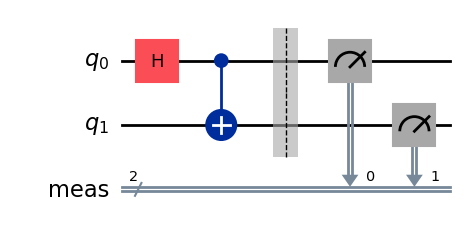

Obfuscated Circuit:


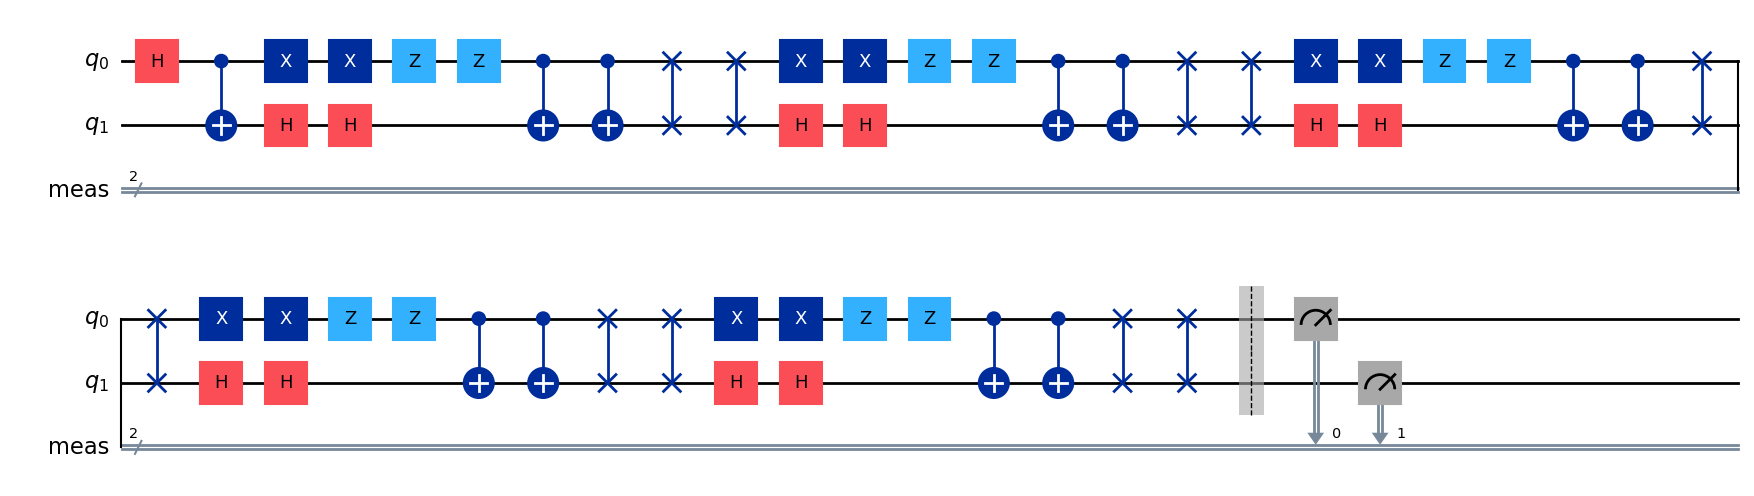

In [91]:
qc_original = QuantumCircuit(2)
qc_original.h(0)
qc_original.cx(0, 1)

qc_obfuscated = QuantumCircuit(2)
qc_obfuscated.h(0)
qc_obfuscated.cx(0, 1)

for _ in range(5):
    qc_obfuscated.x(0)
    qc_obfuscated.x(0)
    
    qc_obfuscated.h(1)
    qc_obfuscated.h(1)
    
    qc_obfuscated.z(0)
    qc_obfuscated.z(0)
    
    qc_obfuscated.cx(0, 1)
    qc_obfuscated.cx(0, 1)
    
    qc_obfuscated.swap(0, 1)
    qc_obfuscated.swap(0, 1)

qc_original.measure_all()
qc_obfuscated.measure_all()

simulator = AerSimulator()

compiled_original = transpile(qc_original, backend=simulator)
result_original = simulator.run(compiled_original).result()
counts_original = result_original.get_counts()

compiled_obfuscated = transpile(qc_obfuscated, backend=simulator)
result_obfuscated = simulator.run(compiled_obfuscated).result()
counts_obfuscated = result_obfuscated.get_counts()

print("Original Circuit Measurement Results:", counts_original)
print("Obfuscated Circuit Measurement Results:", counts_obfuscated)

print("Original Circuit:")
display(qc_original.draw('mpl'))

print("Obfuscated Circuit:")
display(qc_obfuscated.draw('mpl'))
